# Required Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import env
import acquire
from copy import deepcopy
import prepare
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, RocCurveDisplay



from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

import re


# Data Acquistion

In [2]:
# import dataset using acquire.py and using get_telco_data fuction
df = acquire.get_telco_data()
# first five indexs 
df.head()

Reading from csv file...


,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,...,device_protection,tech_support,streaming_tv,streaming_movies,contract_type_id,paperless_billing,payment_type_id,monthly_charges,total_charges,churn
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,1,No,...,No,Yes,Yes,No,2,Yes,2,65.6,593.3,No
1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,1,No,...,No,No,No,Yes,1,No,2,59.9,542.4,No
2,0004-TLHLJ,Male,0,No,No,4,Yes,No,2,No,...,Yes,No,No,No,1,Yes,1,73.9,280.85,Yes
3,0011-IGKFF,Male,1,Yes,No,13,Yes,No,2,No,...,Yes,No,Yes,Yes,1,Yes,1,98.0,1237.85,Yes
4,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,2,No,...,No,Yes,Yes,No,1,Yes,2,83.9,267.4,Yes


In [3]:
# shape of the original dataframe
df.shape


(7043, 21)

# Data Preparation

In [4]:
#saving copy of orginal data (df) deep=True
pdf = df.copy(deep=True)
# first five indexs 
pdf.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,...,device_protection,tech_support,streaming_tv,streaming_movies,contract_type_id,paperless_billing,payment_type_id,monthly_charges,total_charges,churn
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,1,No,...,No,Yes,Yes,No,2,Yes,2,65.6,593.3,No
1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,1,No,...,No,No,No,Yes,1,No,2,59.9,542.4,No
2,0004-TLHLJ,Male,0,No,No,4,Yes,No,2,No,...,Yes,No,No,No,1,Yes,1,73.9,280.85,Yes
3,0011-IGKFF,Male,1,Yes,No,13,Yes,No,2,No,...,Yes,No,Yes,Yes,1,Yes,1,98.0,1237.85,Yes
4,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,2,No,...,No,Yes,Yes,No,1,Yes,2,83.9,267.4,Yes


# Data info: 7043 Rows & 21 Columns 

In [5]:
# Use info callable fuction to get columns, shape, and dtype
pdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               7043 non-null   object 
 1   gender                    7043 non-null   object 
 2   senior_citizen            7043 non-null   int64  
 3   partner                   7043 non-null   object 
 4   dependents                7043 non-null   object 
 5   tenure                    7043 non-null   int64  
 6   phone_service             7043 non-null   object 
 7   multiple_lines            7043 non-null   object 
 8   internet_service_type_id  7043 non-null   int64  
 9   online_security           7043 non-null   object 
 10  online_backup             7043 non-null   object 
 11  device_protection         7043 non-null   object 
 12  tech_support              7043 non-null   object 
 13  streaming_tv              7043 non-null   object 
 14  streamin

# Convert total_charges from object to float

In [6]:
# totel_charges is an object need to covert to float will use to_numeric errors coerce will be changed to NaN value
pdf['total_charges'] = pd.to_numeric(pdf['total_charges'], errors='coerce')


# Check for NaN values since it will give us errors in machine learning Model

In [7]:
# check for NaN values using isnull and sum in dataframe. There are 11 NaN values in total_charges
pdf.isnull().sum()

customer_id                  0
gender                       0
senior_citizen               0
partner                      0
dependents                   0
tenure                       0
phone_service                0
multiple_lines               0
internet_service_type_id     0
online_security              0
online_backup                0
device_protection            0
tech_support                 0
streaming_tv                 0
streaming_movies             0
contract_type_id             0
paperless_billing            0
payment_type_id              0
monthly_charges              0
total_charges               11
churn                        0
dtype: int64

# Cross Reference NaN values in column with total_charges with tenure to confirm that they are all new customers

In [8]:
# locate and view columns and rows with NaN values using .isna and .any axis 1 
pdf[pdf.isna().any(axis=1)]

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,...,device_protection,tech_support,streaming_tv,streaming_movies,contract_type_id,paperless_billing,payment_type_id,monthly_charges,total_charges,churn
945,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,1,Yes,...,Yes,Yes,Yes,No,3,No,4,56.05,NaN,No
1731,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,3,No internet service,...,No internet service,No internet service,No internet service,No internet service,3,No,2,20.00,NaN,No
1906,2775-SEFEE,Male,0,No,Yes,0,Yes,Yes,1,Yes,...,No,Yes,No,No,3,Yes,3,61.90,NaN,No
2025,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,3,No internet service,...,No internet service,No internet service,No internet service,No internet service,2,Yes,2,19.70,NaN,No
2176,3115-CZMZD,Male,0,No,Yes,0,Yes,No,3,No internet service,...,No internet service,No internet service,No internet service,No internet service,3,No,2,20.25,NaN,No
2250,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,3,No internet service,...,No internet service,No internet service,No internet service,No internet service,3,No,2,25.35,NaN,No
2855,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,1,No,...,Yes,Yes,Yes,No,3,No,2,73.35,NaN,No
3052,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,3,No internet service,...,No internet service,No internet service,No internet service,No internet service,3,No,2,25.75,NaN,No
3118,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,1,Yes,...,Yes,Yes,Yes,No,3,Yes,3,52.55,NaN,No
4054,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,1,Yes,...,Yes,No,Yes,Yes,3,No,2,80.85,NaN,No


# Remove rows with NaN values since they are new customs and have no historical data

In [9]:
# using dropna with axis 0 to remove all rows & use reset_index(drop=True) reset index to start at 0   
pdf = pdf.dropna(axis=0)
pdf.reset_index(drop=True)

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,...,device_protection,tech_support,streaming_tv,streaming_movies,contract_type_id,paperless_billing,payment_type_id,monthly_charges,total_charges,churn
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,1,No,...,No,Yes,Yes,No,2,Yes,2,65.60,593.30,No
1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,1,No,...,No,No,No,Yes,1,No,2,59.90,542.40,No
2,0004-TLHLJ,Male,0,No,No,4,Yes,No,2,No,...,Yes,No,No,No,1,Yes,1,73.90,280.85,Yes
3,0011-IGKFF,Male,1,Yes,No,13,Yes,No,2,No,...,Yes,No,Yes,Yes,1,Yes,1,98.00,1237.85,Yes
4,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,2,No,...,No,Yes,Yes,No,1,Yes,2,83.90,267.40,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,9987-LUTYD,Female,0,No,No,13,Yes,No,1,Yes,...,No,Yes,No,No,2,No,2,55.15,742.90,No
7028,9992-RRAMN,Male,0,Yes,No,22,Yes,Yes,2,No,...,No,No,No,Yes,1,Yes,1,85.10,1873.70,Yes
7029,9992-UJOEL,Male,0,No,No,2,Yes,No,1,No,...,No,No,No,No,1,Yes,2,50.30,92.75,No
7030,9993-LHIEB,Male,0,Yes,Yes,67,Yes,No,1,Yes,...,Yes,Yes,No,Yes,3,No,2,67.85,4627.65,No


# Verify that only 11 rows have been removed 

In [10]:
# verify df.shape minus pdf.shape to verify row have been romoved 
pdf.shape

(7032, 21)

# Verify no NaN values present in data

In [11]:
# verify that all NaN values have been removed
pdf.isnull().sum()

customer_id                 0
gender                      0
senior_citizen              0
partner                     0
dependents                  0
tenure                      0
phone_service               0
multiple_lines              0
internet_service_type_id    0
online_security             0
online_backup               0
device_protection           0
tech_support                0
streaming_tv                0
streaming_movies            0
contract_type_id            0
paperless_billing           0
payment_type_id             0
monthly_charges             0
total_charges               0
churn                       0
dtype: int64

# Check if there is any duplicate data

In [12]:
pdf.duplicated().sum()

0

# Exploritory Data Analysis

In [13]:
# saving deep copy of pdf
eda = pdf.copy(deep=True)

In [36]:
eda.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               7032 non-null   object 
 1   gender                    7032 non-null   object 
 2   senior_citizen            7032 non-null   int64  
 3   partner                   7032 non-null   object 
 4   dependents                7032 non-null   object 
 5   tenure                    7032 non-null   int64  
 6   phone_service             7032 non-null   object 
 7   multiple_lines            7032 non-null   object 
 8   internet_service_type_id  7032 non-null   int64  
 9   online_security           7032 non-null   object 
 10  online_backup             7032 non-null   object 
 11  device_protection         7032 non-null   object 
 12  tech_support              7032 non-null   object 
 13  streaming_tv              7032 non-null   object 
 14  streamin

In [14]:
# first five indexs 
eda.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,...,device_protection,tech_support,streaming_tv,streaming_movies,contract_type_id,paperless_billing,payment_type_id,monthly_charges,total_charges,churn
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,1,No,...,No,Yes,Yes,No,2,Yes,2,65.6,593.30,No
1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,1,No,...,No,No,No,Yes,1,No,2,59.9,542.40,No
2,0004-TLHLJ,Male,0,No,No,4,Yes,No,2,No,...,Yes,No,No,No,1,Yes,1,73.9,280.85,Yes
3,0011-IGKFF,Male,1,Yes,No,13,Yes,No,2,No,...,Yes,No,Yes,Yes,1,Yes,1,98.0,1237.85,Yes
4,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,2,No,...,No,Yes,Yes,No,1,Yes,2,83.9,267.40,Yes


# Split data into Train, Validate, and Test

In [15]:
train_validate, test = train_test_split(eda, test_size=0.2, random_state=42, stratify=eda['churn'])
train, validate = train_test_split(train_validate, test_size=0.3, random_state=42, stratify=train_validate['churn'])

In [16]:
dummy_train = pd.get_dummies(train[['gender', 'partner', 'dependents', 'phone_service', 'multiple_lines', 
                            'online_security', 'online_backup', 'device_protection', 'tech_support', 'streaming_tv', 
                            'streaming_movies', 'paperless_billing', 'churn']], drop_first=[True])
dummy_validate = pd.get_dummies(validate[['gender', 'partner', 'dependents', 'phone_service', 'multiple_lines', 
                            'online_security', 'online_backup', 'device_protection', 'tech_support', 'streaming_tv', 
                            'streaming_movies', 'paperless_billing', 'churn']], drop_first=[True])
dummy_test = pd.get_dummies(test[['gender', 'partner', 'dependents', 'phone_service', 'multiple_lines', 
                            'online_security', 'online_backup', 'device_protection', 'tech_support', 'streaming_tv', 
                            'streaming_movies', 'paperless_billing', 'churn']], drop_first=[True])

train = pd.concat([train, dummy_train], axis=1)
validate = pd.concat([validate, dummy_validate], axis=1)
test = pd.concat([test, dummy_test], axis=1)

train = train.drop(columns=['gender', 'partner', 'dependents', 'phone_service', 'multiple_lines', 
                            'online_security', 'online_backup', 'device_protection', 'tech_support', 'streaming_tv', 
                            'streaming_movies', 'paperless_billing', 'churn'])
validate = validate.drop(columns=['gender', 'partner', 'dependents', 'phone_service', 'multiple_lines', 
                            'online_security', 'online_backup', 'device_protection', 'tech_support', 'streaming_tv', 
                            'streaming_movies', 'paperless_billing', 'churn'])
test = test.drop(columns=['gender', 'partner', 'dependents', 'phone_service', 'multiple_lines', 
                            'online_security', 'online_backup', 'device_protection', 'tech_support', 'streaming_tv', 
                            'streaming_movies', 'paperless_billing', 'churn'])

X_train = train.drop(columns=['churn_Yes'])
y_train = train.churn_Yes

X_validate = validate.drop(columns=['churn_Yes'])
y_validate = validate.churn_Yes

X_test = test.drop(columns=['churn_Yes'])
y_test = test.churn_Yes

In [17]:
# Create list of categorical and numerical features  
cat_features = []
num_features = []
for feature in train.columns:
  if train[feature].dtype == 'uint8' or 'int64':
    cat_features.append(feature)
  if train[feature].dtype == 'float64':
    num_features.append(feature)
cat_features.remove("tenure")
cat_features.remove("monthly_charges")
cat_features.remove("total_charges")
num_features.insert(3, "tenure") 


In [37]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1407 entries, 985 to 2096
Data columns (total 28 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customer_id                            1407 non-null   object 
 1   senior_citizen                         1407 non-null   int64  
 2   tenure                                 1407 non-null   int64  
 3   internet_service_type_id               1407 non-null   int64  
 4   contract_type_id                       1407 non-null   int64  
 5   payment_type_id                        1407 non-null   int64  
 6   monthly_charges                        1407 non-null   float64
 7   total_charges                          1407 non-null   float64
 8   gender_Male                            1407 non-null   uint8  
 9   partner_Yes                            1407 non-null   uint8  
 10  dependents_Yes                         1407 non-null   uint8  
 11  ph

In [18]:
num_features

['monthly_charges', 'total_charges', 'tenure']

Descriptive Stats:


,count,mean,std,min,25%,50%,75%,max
senior_citizen,3937.0,0.158750,0.365490,0.00,0.0,0.00,0.0,1.00
tenure,3937.0,32.183896,24.599572,1.00,9.0,28.00,55.0,72.00
internet_service_type_id,3937.0,1.859030,0.732999,1.00,1.0,2.00,2.0,3.00
contract_type_id,3937.0,1.680721,0.828799,1.00,1.0,1.00,2.0,3.00
payment_type_id,3937.0,2.311151,1.150716,1.00,1.0,2.00,3.0,4.00
monthly_charges,3937.0,65.054305,29.855770,18.55,38.9,70.35,89.8,118.75
total_charges,3937.0,2270.283744,2266.882193,18.80,399.6,1390.60,3753.2,8684.80
gender_Male,3937.0,0.504699,0.500041,0.00,0.0,1.00,1.0,1.00
partner_Yes,3937.0,0.474981,0.499437,0.00,0.0,0.00,1.0,1.00
dependents_Yes,3937.0,0.297943,0.457412,0.00,0.0,0.00,1.0,1.00


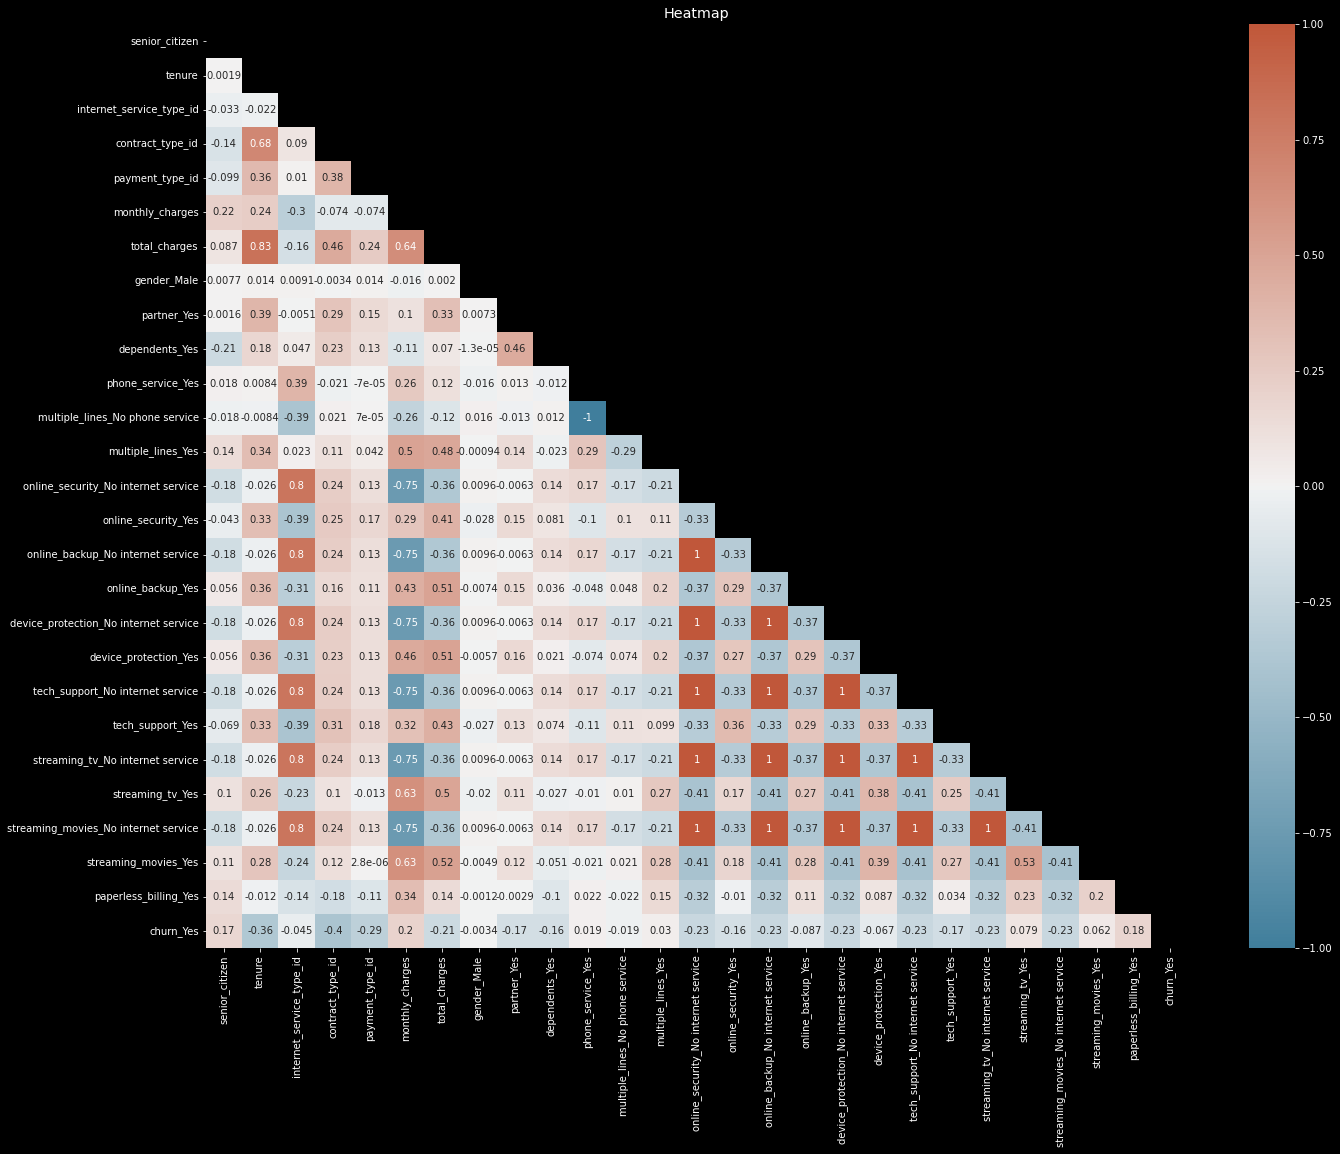

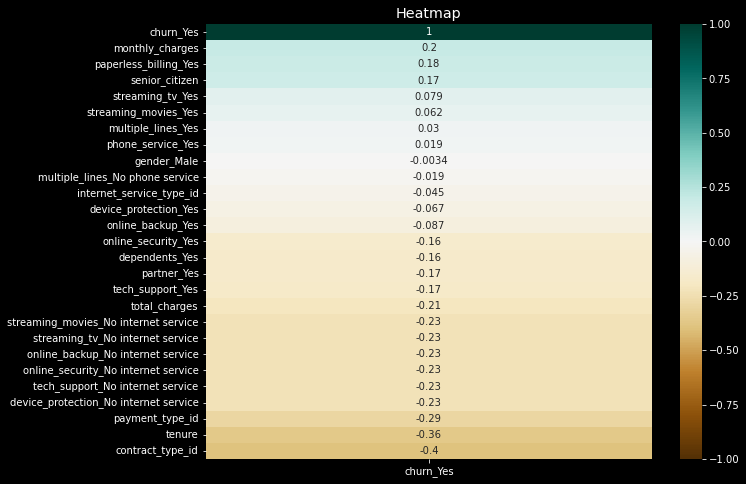

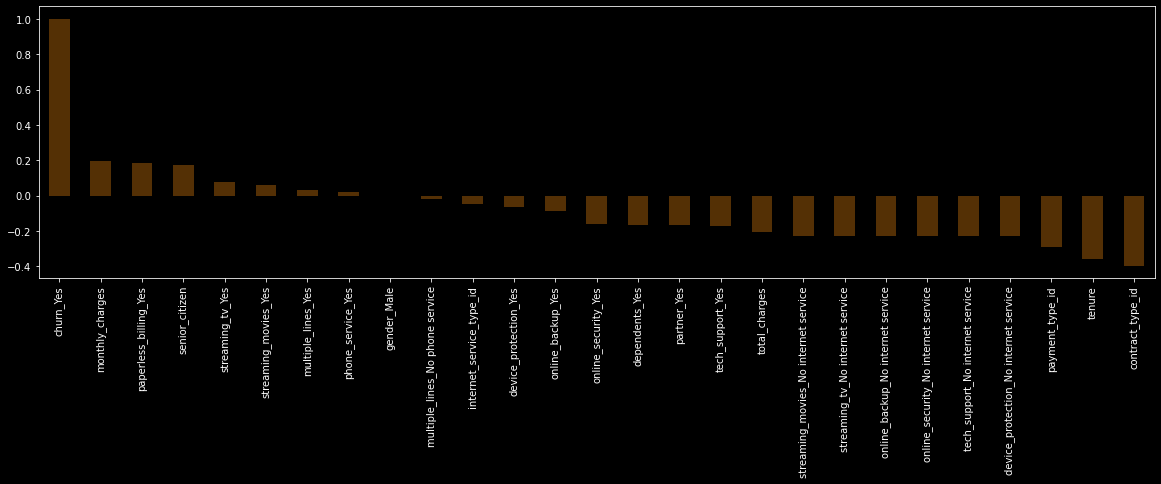

In [19]:
prepare.corrstatsgraphs(train)

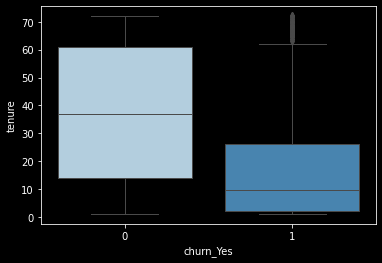

In [20]:
sns.boxplot(y='tenure', x='churn_Yes', palette="Blues", linewidth=1, data=train) 
plt.show()

Churn customers have a lower tenure with a median of 10 months compared with non-churn customers with a median of 38 months 

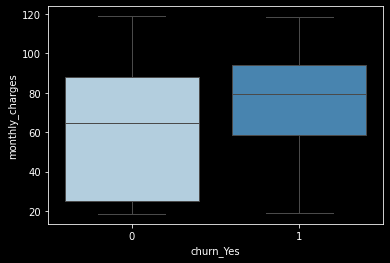

In [21]:
sns.boxplot(y='monthly_charges', x='churn_Yes', palette="Blues", linewidth=1, data=train)
plt.show()

Churn customers with higher monthly charges churn at median monthly charge of $78 dollas compared with non-churn customers of $64. 

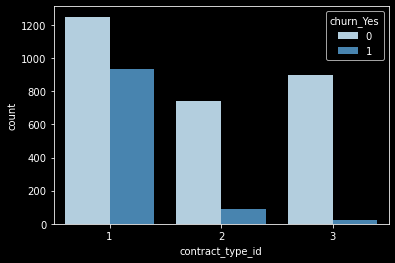

In [22]:
sns.countplot(x='contract_type_id', hue='churn_Yes', palette="Blues", linewidth=1, data=train)
plt.show()

Customers who pay month-to-month (1) greatly outway contacted customers one year (2) and two year (3)

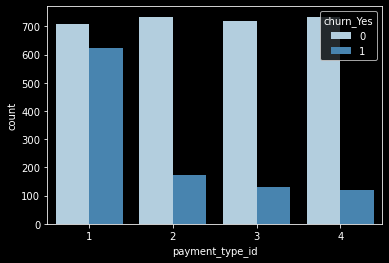

In [23]:
sns.countplot(x='payment_type_id', hue='churn_Yes', palette="Blues", linewidth=1, data=train)
plt.show()

Customers who pay manualy through electronic check (1) have a greater churn rate comparied to those who pay automaticly (3 and 4). 

# Feature seletion Using Statistical Test


T-Test comparing continuous numerical features to see if they corralates to target 

In [24]:
# calls a loop function to test corralation between numerical continuous features 
rem_num_features = prepare.correlation_test(test, 'churn_Yes', num_features)
print('features to be removed:', rem_num_features)

The T-Test result are :

monthly_charges correlates with churn_Yes | P-Value: 1.7191754209681004e-11
total_charges correlates with churn_Yes | P-Value: 2.82793907604287e-15
tenure correlates with churn_Yes | P-Value: 6.373182230293988e-46



features to be removed: []


CHI2 Test for feature selection of target vs categorical features

In [25]:
# calls a loop function to test corralation between catagorical non-continuous features p<0.05
rem_cat_features = prepare.chi2_test(train, 'churn_Yes', cat_features)
print('features to be removed:', rem_cat_features)

The Chi2_test result are : 

customer_id does not correlates with churn_Yes | P-Value: 0.4925068035871357
senior_citizen correlates with churn_Yes | P-Value: 9.378255093847666e-27
internet_service_type_id correlates with churn_Yes | P-Value: 2.597796273841182e-91
contract_type_id correlates with churn_Yes | P-Value: 3.187283155417511e-146
payment_type_id correlates with churn_Yes | P-Value: 7.877817099963843e-93
gender_Male does not correlates with churn_Yes | P-Value: 0.861632473509993
partner_Yes correlates with churn_Yes | P-Value: 1.8366509252861605e-25
dependents_Yes correlates with churn_Yes | P-Value: 9.841971845599136e-25
phone_service_Yes does not correlates with churn_Yes | P-Value: 0.25663875883715864
multiple_lines_No phone service does not correlates with churn_Yes | P-Value: 0.25663875883715864
multiple_lines_Yes does not correlates with churn_Yes | P-Value: 0.06730757587466035
online_security_No internet service correlates with churn_Yes | P-Value: 4.508275911262558e-47


# categorical features to be removed P < 0.05:
'customer_id', 'gender_Male', 'phone_service_Yes', 'multiple_lines_No phone service', 'multiple_lines_Yes']

In [26]:
X_train.drop(rem_cat_features, axis=1, inplace=True)

In [27]:
X_validate.drop(rem_cat_features, axis=1, inplace=True)

In [28]:
X_test.drop(rem_cat_features, axis=1, inplace=True)

In [29]:
X_train.head()

,senior_citizen,tenure,internet_service_type_id,contract_type_id,payment_type_id,monthly_charges,total_charges,partner_Yes,dependents_Yes,online_security_No internet service,...,online_backup_Yes,device_protection_No internet service,device_protection_Yes,tech_support_No internet service,tech_support_Yes,streaming_tv_No internet service,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,paperless_billing_Yes
1947,0,37,2,1,1,95.25,3314.15,1,1,0,...,0,0,0,0,0,0,1,0,1,1
6613,0,69,3,3,4,24.60,1678.05,0,0,1,...,0,1,0,1,0,1,0,1,0,0
6256,0,72,2,3,3,111.60,8012.75,0,0,0,...,1,0,1,0,1,0,1,0,1,1
5070,0,17,2,1,3,80.05,1345.65,0,0,0,...,0,0,1,0,0,0,0,0,0,0
67,0,49,1,2,1,84.35,4059.35,1,0,0,...,0,0,1,0,1,0,1,0,1,0


In [30]:
classifications_list = [
    LogisticRegression(max_iter=500), 
    KNeighborsClassifier(n_neighbors=7), DecisionTreeClassifier(max_depth=3), RandomForestClassifier(n_estimators=1000, criterion='entropy',max_features='sqrt'),
    ExtraTreesClassifier(), AdaBoostClassifier(), GradientBoostingClassifier(learning_rate=0.01, loss='exponential', max_depth=3, n_estimators=2000, subsample=0.5), 
    MLPClassifier(activation='logistic', alpha=0.0001, learning_rate='constant', solver='adam'),
    RidgeClassifier(alpha=0.4)
]

In [31]:
classifierList = [
    LogisticRegression(max_iter=500), 
    KNeighborsClassifier(n_neighbors=7), DecisionTreeClassifier(max_depth=3), RandomForestClassifier(n_estimators=1000, criterion='entropy',max_features='sqrt'),
    ExtraTreesClassifier(), AdaBoostClassifier(), GradientBoostingClassifier(learning_rate=0.01, loss='exponential', max_depth=3, n_estimators=2000, subsample=0.5), 
    MLPClassifier(activation='logistic', alpha=0.0001, learning_rate='constant', solver='adam'),
    RidgeClassifier(alpha=0.4)
]

In [32]:
prepare.model_magic(X_train, y_train, X_validate, y_validate, X_test, y_test, classifierList)

,ModelName,AccuracyScore,AccuracyScoreVAL,CorrectPredictionsCount,CorrectPredictionsCountVAL,Total,TotalVAL,PosPrecScore,PosPrecScoreVAL,PosRecScore,...,NegFScore,NegFScoreVAL,TNPercentage,TNPercentageVAL,TPPercentage,TPPercentageVAL,FNPercentage,FNPercentageVAL,FPPercentage,FPPercentageVAL
0,LogisticRegression,0.796020,0.795616,1120,1343,1407.0,1688.0,0.643564,0.646893,0.521390,...,0.865700,0.865915,65.742715,79.175551,13.859275,16.275764,12.722104,15.636105,7.675906,8.884151
1,KNeighborsClassifier,0.781095,0.776659,1099,1311,1407.0,1688.0,0.629921,0.613924,0.427807,...,0.859103,0.855611,66.737740,79.388770,11.371713,13.788202,15.209666,18.123667,6.680881,8.670931
2,DecisionTreeClassifier,0.791756,0.772512,1114,1304,1407.0,1688.0,0.701493,0.637131,0.377005,...,0.869138,0.857249,69.154229,81.947406,10.021322,10.732054,16.560057,21.179815,4.264392,6.112296
3,RandomForestClassifier,0.792466,0.790284,1115,1334,1407.0,1688.0,0.643357,0.644377,0.491979,...,0.864438,0.863741,66.169154,79.744136,13.077470,15.067520,13.503909,16.844350,7.249467,8.315565
4,ExtraTreesClassifier,0.769723,0.776066,1083,1310,1407.0,1688.0,0.583893,0.603499,0.465241,...,0.848739,0.853715,64.605544,78.393746,12.366738,14.712154,14.214641,17.199716,8.813077,9.665956
5,AdaBoostClassifier,0.793888,0.790284,1117,1334,1407.0,1688.0,0.641892,0.637681,0.508021,...,0.864739,0.862897,65.884861,79.175551,13.503909,15.636105,13.077470,16.275764,7.533760,8.884151
6,GradientBoostingClassifier,0.798863,0.797393,1124,1346,1407.0,1688.0,0.650165,0.655977,0.526738,...,0.867571,0.867647,65.884861,79.673063,14.001421,15.991471,12.579957,15.920398,7.533760,8.386638
7,MLPClassifier,0.800995,0.784360,1127,1324,1407.0,1688.0,0.675373,0.643098,0.483957,...,0.871087,0.861597,67.235252,80.525942,12.864250,13.574982,13.717129,18.336887,6.183369,7.533760
8,RidgeClassifier,0.796020,0.784953,1120,1325,1407.0,1688.0,0.660517,0.632716,0.478610,...,0.867681,0.860546,66.879886,79.601990,12.722104,14.570007,13.859275,17.341862,6.538735,8.457711


In [33]:
prepare.magic2(eda)

,ModelName,AccuracyScore,AccuracyScoreVAL,CorrectPredictionsCount,CorrectPredictionsCountVAL,Total,TotalVAL,PosPrecScore,PosPrecScoreVAL,PosRecScore,...,NegFScore,NegFScoreVAL,TNPercentage,TNPercentageVAL,TPPercentage,TPPercentageVAL,FNPercentage,FNPercentageVAL,FPPercentage,FPPercentageVAL
0,LogisticRegression,0.802416,0.793246,1129,1339,1407.0,1688.0,0.660000,0.639665,0.529412,...,0.870093,0.864149,66.169154,78.891258,14.072495,16.275764,12.508884,15.636105,7.249467,9.168443
1,KNeighborsClassifier,0.783227,0.781991,1102,1320,1407.0,1688.0,0.634241,0.629393,0.435829,...,0.860284,0.859220,66.737740,79.815210,11.584932,14.001421,14.996446,17.910448,6.680881,8.244492
2,DecisionTreeClassifier,0.791756,0.772512,1114,1304,1407.0,1688.0,0.701493,0.637131,0.377005,...,0.869138,0.857249,69.154229,81.947406,10.021322,10.732054,16.560057,21.179815,4.264392,6.112296
3,RandomForestClassifier,0.788202,0.789692,1109,1333,1407.0,1688.0,0.631944,0.639053,0.486631,...,0.861524,0.862881,65.884861,79.388770,12.935323,15.351812,13.646055,16.560057,7.533760,8.670931
4,ExtraTreesClassifier,0.775409,0.779621,1091,1316,1407.0,1688.0,0.600000,0.612903,0.465241,...,0.853023,0.856148,65.174129,78.678038,12.366738,14.854300,14.214641,17.057569,8.244492,9.381663
5,AdaBoostClassifier,0.793888,0.788507,1117,1331,1407.0,1688.0,0.645833,0.630682,0.497326,...,0.865242,0.861359,66.169154,78.820185,13.219616,15.778252,13.361763,16.133618,7.249467,9.239517
6,GradientBoostingClassifier,0.809524,0.799763,1139,1350,1407.0,1688.0,0.680272,0.662757,0.534759,...,0.875116,0.869296,66.737740,79.886283,14.214641,16.062544,12.366738,15.849325,6.680881,8.173419
7,MLPClassifier,0.803838,0.793839,1131,1340,1407.0,1688.0,0.700820,0.683636,0.457219,...,0.874317,0.868778,68.230277,81.876333,12.153518,13.361763,14.427861,18.550107,5.188344,6.183369
8,RidgeClassifier,0.797441,0.792062,1122,1337,1407.0,1688.0,0.665428,0.654088,0.478610,...,0.868724,0.865466,67.022033,80.241649,12.722104,14.783227,13.859275,17.128643,6.396588,7.818053


In [34]:
def graphs(X_train, y_train):
    
    model.fit(X_train, y_train)  
            
    ax = plt.gca()
    disp = RocCurveDisplay.from_estimator(model, X_test, y_test, ax=ax, alpha=0.8)
    disp.plot(ax=ax, alpha=0.8)
    return disp

In [35]:
disp = prepare.graphs(X_train, y_train, X_test, y_test, classifierList)

NameError: name 'models' is not defined

# Hypertuning peramiters 

MLPClassifier

In [ ]:
# specify number of folds for k-fold CV
n_folds = 5

# # parameters to build the model on
mlp_parameters = {
    'activation': ['tanh', 'relu', 'identity','logistic'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

# # instantiate the model
mlp = MLPClassifier(max_iter=500)

# # fit tree on training data
mlp = GridSearchCV(mlp, mlp_parameters,
                n_jobs=-1, cv=n_folds, 
                scoring="accuracy")
mlp.fit(X_train, y_train)

In [ ]:
print('Best parameters found:\n', mlp.best_params_)

In [ ]:
scores_activation = mlp.cv_results_
pd.DataFrame(scores_activation).sort_values(["rank_test_score"], ascending=True).head(5)

RandomForestClassifier()

In [ ]:
rf_parameters = {
    'n_estimators': [10,100, 1000], 
    'max_features': ['sqrt', 'log2'],
    'criterion' : ['gini','entropy']
}
rf = RandomForestClassifier()

#fit tree on training data
rf = GridSearchCV(rf, rf_parameters,
                n_jobs=-1, cv=5, verbose=1) 
                
rf.fit(X_train, y_train)

In [ ]:
print('Best parameters found:\n', rf.best_params_)

In [ ]:
scores_activation = rf.cv_results_
pd.DataFrame(scores_activation).sort_values(["rank_test_score"], ascending=True)

# GradientBoostingClassifier

In [ ]:
gbc_parameters = {
    'n_estimators' : [10, 100, 1000],
    'learning_rate' : [0.001, 0.01, 0.1],
    'subsample' : [0.5, 0.7, 1.0],
    'max_depth' : [3, 7, 9],
    'loss' : ['deviance','exponential']
}
gbc = GradientBoostingClassifier()

#fit tree on training data
gbc = GridSearchCV(gbc, gbc_parameters,
                n_jobs=-1, scoring="accuracy", cv=3) 
                
gbc.fit(X_train, y_train)

In [ ]:
print('Best parameters found:\n', gbc.best_params_)

In [ ]:
scores_activation = gbc.cv_results_
pd.DataFrame(scores_activation).sort_values(["rank_test_score"], ascending=True)

# RidgeClassifier

In [ ]:
# specify number of folds for k-fold CV
n_folds = 5

# # parameters to build the model on
rc_parameters = {
    'solver': ['auto','svd', 'cholesky', 'sparse_cg','lsqr','sag','lbfgs'],
    'alpha': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
    'fit_intercept': [True, False]
}

# # instantiate the model
rc = RidgeClassifier()

# # fit tree on training data
rc = GridSearchCV(rc, rc_parameters,
                n_jobs=-1, cv=n_folds, 
                scoring="accuracy")
rc.fit(X_train, y_train)

In [ ]:
print('Best parameters found:\n', rc.best_params_)